In [27]:
import numpy as np
from datetime import datetime, timedelta
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import sys

import metpy

sys.path.append('/pyBKB_v3')
'''
from BB_GOES.get_GOES import get_GOES_nearesttime

DATE = datetime(2019, 4, 17, 15)

# This functin gets the nearest file name and path on our local disk. 
# You might want to download GOES files from Amazon.
file16 = get_GOES_nearesttime(DATE, product='ABI', satellite=16, verbose=False)
file17 = get_GOES_nearesttime(DATE, product='ABI', satellite=17, verbose=False)
'''
G16 = xarray.open_dataset('OR_ABI-L2-MCMIPC-M6_G16_s20191771701200_e20191771703573_c20191771704096.nc')
G17 = xarray.open_dataset('OR_ABI-L2-MCMIPC-M6_G17_s20191771701197_e20191771703570_c20191771704070.nc')


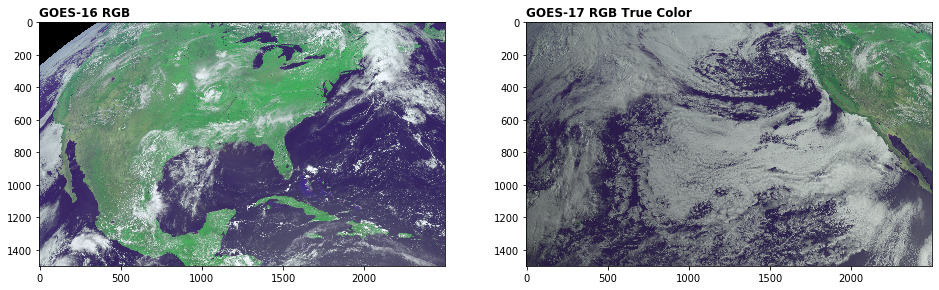

In [28]:
R_16 = G16['CMI_C02'].data
G_16 = G16['CMI_C03'].data
B_16 = G16['CMI_C01'].data
R_17 = G17['CMI_C02'].data
G_17 = G17['CMI_C03'].data
B_17 = G17['CMI_C01'].data


R_16 = np.clip(R_16, 0, 1)
G_16 = np.clip(G_16, 0, 1)
B_16 = np.clip(B_16, 0, 1)
R_17 = np.clip(R_17, 0, 1)
G_17 = np.clip(G_17, 0, 1)
B_17 = np.clip(B_17, 0, 1)

gamma = 2.2
R_16 = np.power(R_16, 1/gamma)
G_16 = np.power(G_16, 1/gamma)
B_16 = np.power(B_16, 1/gamma)
R_17 = np.power(R_17, 1/gamma)
G_17 = np.power(G_17, 1/gamma)
B_17 = np.power(B_17, 1/gamma)

RGB_16 = np.dstack([R_16, G_16, B_16])#making the 3D array [,,]
RGB_17 = np.dstack([R_17, G_17, B_17])#making the 3D array [,,]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.imshow(RGB_16)
ax1.set_title('GOES-16 RGB', fontweight='semibold', loc='left', fontsize=12);

ax2.imshow(RGB_17)
ax2.set_title('GOES-17 RGB True Color', fontweight='semibold', loc='left', fontsize=12);


In [29]:
# Generate cartopy projection object with metpy parser
# NOTE: Don't re-run this cell after it has run or it won't work.
dat16 = G16.metpy.parse_cf('CMI_C02')
dat17 = G17.metpy.parse_cf('CMI_C02')

# Geostationary projections
geos16 = dat16.metpy.cartopy_crs
geos17 = dat17.metpy.cartopy_crs

/opt/home/adomakor412/.conda/envs/GOESCode/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/opt/home/adomakor412/.conda/envs/GOESCode/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


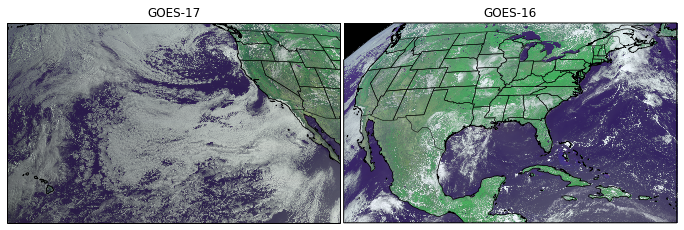

In [30]:
x16 = dat16.x
y16 = dat16.y

x17 = dat17.x
y17 = dat17.y
pc = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection=geos17)
ax2 = fig.add_subplot(1, 2, 2, projection=geos16)

## GOES 17
ax1.imshow(RGB_17, origin='upper', extent=(x17.min(), x17.max(), y17.min(), y17.max()),
           transform=geos17)
ax1.coastlines(resolution='50m', color='black', linewidth=.75)
ax1.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax1.set_title('GOES-17')

## GOES 16
ax2.imshow(RGB_16, origin='upper', extent=(x16.min(), x16.max(), y16.min(), y16.max()),
           transform=geos16)
ax2.coastlines(resolution='50m', color='black', linewidth=.75)
ax2.add_feature(ccrs.cartopy.feature.STATES, linewidth=.5)
ax2.set_title('GOES-16')

fig.subplots_adjust(wspace=.01)

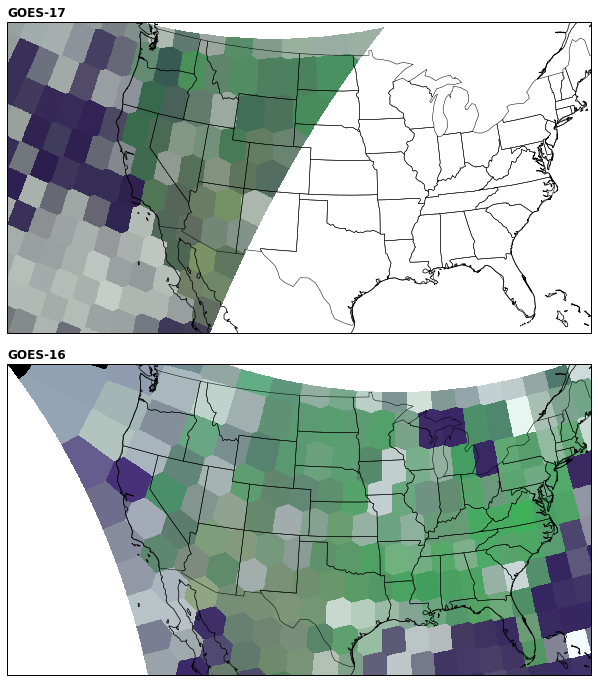

In [31]:
#Downsampling the image makes it faster to plot large areas
thin = 100


fig = plt.figure(figsize=[12, 12])


lc = ccrs.LambertConformal(central_longitude = -97.5,
                           standard_parallels = (38.5, 38.5))

ax1 = fig.add_subplot(2, 1, 1, projection=lc)
ax2 = fig.add_subplot(2, 1, 2, projection=lc)

ax1.set_extent([-130, -75, 25, 48], crs=pc)
ax2.set_extent([-130, -75, 25, 48], crs=pc)

#ax1.set_extent([-155, -70, 20, 45], crs=pc)
#ax1.set_extent([-122.72, -72.29, 24.36, 50.45], crs=pc) # HRRR


# GOES17
ax1.imshow(RGB_17[::thin,::thin], origin='upper',
           extent=(x17.min(), x17.max(), y17.min(), y17.max()),
           transform=geos17, 
           interpolation='none')

ax1.coastlines(resolution='50m', color='black', linewidth=0.75)
ax1.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.5)
ax1.set_title('GOES-17', loc='left', fontweight='bold')


# GOES16
# The imshow transform seems to take a long time
ax2.imshow(RGB_16[::thin,::thin], origin='upper',
           extent=(x16.min(), x16.max(), y16.min(), y16.max()),
           transform=geos16,
           interpolation='none')

ax2.coastlines(resolution='50m', color='black', linewidth=0.75)
ax2.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.5)
ax2.set_title('GOES-16', loc='left', fontweight='bold')


fig.subplots_adjust(hspace=.1)

thin:  2
0:00:05.276772
0:00:10.576503


Text(0.5, 1.0, 'GOES-17 Overlaid on GOES-16')

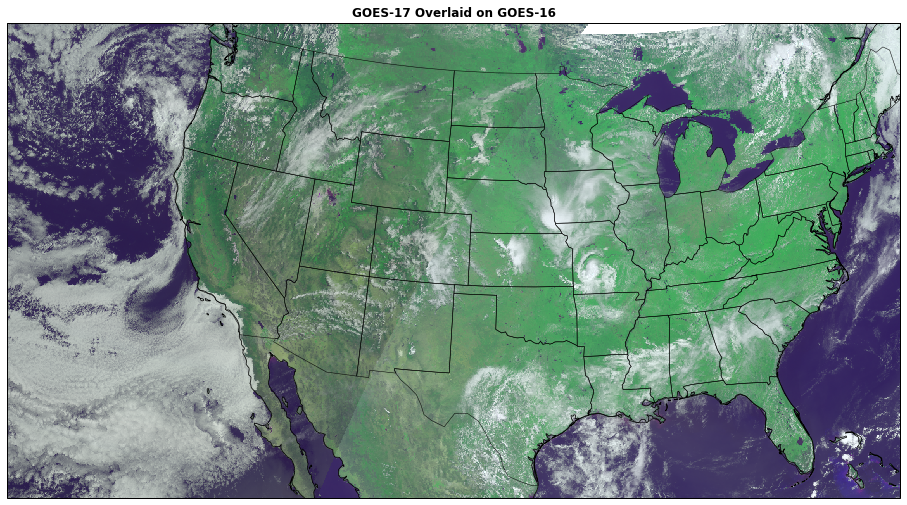

In [35]:
# Downsampling the image makes it faster to plot large areas
thin = 2
print("thin: ", thin)

fig = plt.figure(figsize=[16, 12])


lc = ccrs.LambertConformal(central_longitude = -97.5,
                           standard_parallels = (38.5, 38.5))

ax3 = fig.add_subplot(1, 1, 1, projection=lc)
ax3.set_extent([-130, -75, 25, 48], crs=pc)

# GOES16 + GOES17

# The imshow transform seems to take a long time
timer = datetime.now()
ax3.imshow(RGB_16[::thin,::thin], origin='upper',
           extent=(x16.min(), x16.max(), y16.min(), y16.max()),
           transform=geos16,
           interpolation='none')
print(datetime.now()-timer)

ax3.imshow(RGB_17[::thin,::thin], origin='upper',
           extent=(x17.min(), x17.max(), y17.min(), y17.max()),
           transform=geos17,
           interpolation='none')
print(datetime.now()-timer)

ax3.coastlines(resolution='50m', color='black', linewidth=0.75)
ax3.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.5)

plt.title('GOES-17 Overlaid on GOES-16', fontweight='bold')

In [33]:
def make_RGB(C, night_IR=True):
    """
    C        - GOES file opened with xarray
    night_IR - Set nighttime pixels as clean IR channel (channel 13, 10.3 um).
    """
    
    # Load the three channels into appropriate R, G, and B variables
    R = C['CMI_C02'].data
    G = C['CMI_C03'].data
    B = C['CMI_C01'].data

    ######################################################################
    #

    # Apply range limits for each channel. RGB values must be between 0 and 1
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    ######################################################################
    #

    # Apply a gamma correction to the image
    gamma = 2.2
    R = np.power(R, 1/gamma)
    G = np.power(G, 1/gamma)
    B = np.power(B, 1/gamma)

    ######################################################################
    #

    # Calculate the "True" Green
    G_true = 0.45 * R + 0.1 * G + 0.45 * B
    G_true = np.maximum(G_true, 0)
    G_true = np.minimum(G_true, 1)
    
    # The RGB array with the raw veggie band
    RGB_veggie = np.dstack([R, G, B])

    # The RGB array for the true color image
    RGB = np.dstack([R, G_true, B])
    
    if night_IR:
        cleanIR = C['CMI_C13'].data
        # Normalize the channel between a range. e.g. cleanIR =
        # (cleanIR-minimum)/(maximum-minimum)
        cleanIR = (cleanIR-90)/(313-90)

        # Apply range limits for each channel. RGB values must be between 0 and 1
        cleanIR = np.clip(cleanIR, 0, 1)

        # Invert colors so that cold clouds are white
        cleanIR = 1 - cleanIR

        # Lessen the brightness of the coldest clouds so they don't appear so bright
        # when we overlay it on the true color image
        cleanIR = cleanIR/1.4
    
        # Fill RGB where true color is black with IR values.
        RGB = np.dstack([np.maximum(R, cleanIR),
                         np.maximum(G_true, cleanIR),
                         np.maximum(B, cleanIR)])
        
    return RGB
# Make RGB for both GOES16 and GOES17


In [36]:
rgb16 = make_RGB(G16)
rgb17 = make_RGB(G17)

scan_start_16 = datetime.strptime(G16.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
scan_start_17 = datetime.strptime(G17.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')

In [56]:
print(G16['CMI_C16'].data)

[[      nan       nan       nan ... 261.4698  261.35965 261.35965]
 [      nan       nan       nan ... 261.4698  261.4698  261.4698 ]
 [      nan       nan       nan ... 261.35965 261.63507 261.35965]
 ...
 [272.10052 272.10052 272.10052 ... 275.4605  275.79102 275.35034]
 [271.9353  271.9353  272.10052 ... 275.07495 275.35034 275.4605 ]
 [270.9989  270.9989  271.9353  ... 273.9182  274.74445 275.79102]]


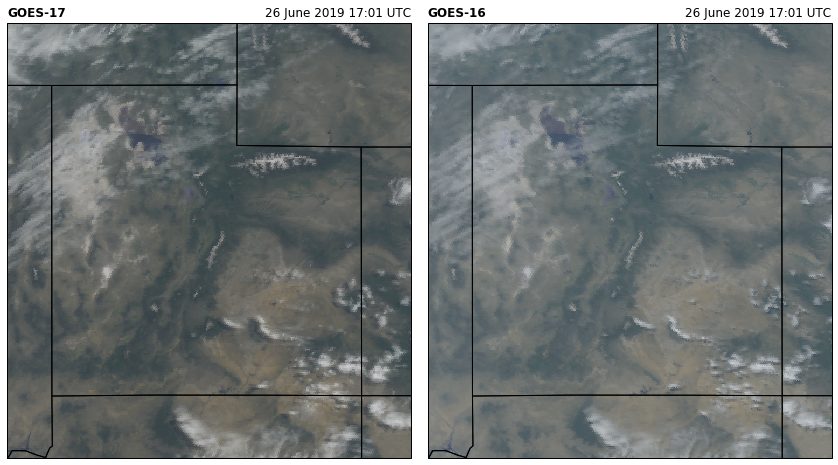

In [9]:
fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(1, 2, 1, projection=pc)
ax2 = fig.add_subplot(1, 2, 2, projection=pc)

ax1.set_extent([-114.75, -108.25, 36, 43], crs=pc)
ax2.set_extent([-114.75, -108.25, 36, 43], crs=pc)


# GOES17
ax1.imshow(rgb17, origin='upper',
           extent=(x17.min(), x17.max(), y17.min(), y17.max()),
           transform=geos17,
           interpolation='none')
ax1.add_feature(ccrs.cartopy.feature.STATES)
ax1.set_title('GOES-17', loc='left', fontweight='bold')
ax1.set_title('%s' % scan_start_17.strftime('%d %B %Y %H:%M UTC'), loc='right');

# GOES16
ax2.imshow(rgb16, origin='upper',
           extent=(x16.min(), x16.max(), y16.min(), y16.max()),
           transform=geos16,
           interpolation='none')
ax2.add_feature(ccrs.cartopy.feature.STATES)
ax2.set_title('GOES-16', loc='left', fontweight='bold')
ax2.set_title('%s' % scan_start_16.strftime('%d %B %Y %H:%M UTC'), loc='right');


fig.subplots_adjust(wspace=.01)

In [10]:
import pyproj
prj = pyproj.Proj("+proj=eqc +units=m") 
a = prj(-114.75, 36) # lower left coordinates
b = prj(-108.25, 43) # upper right coordinates
extent = a + b

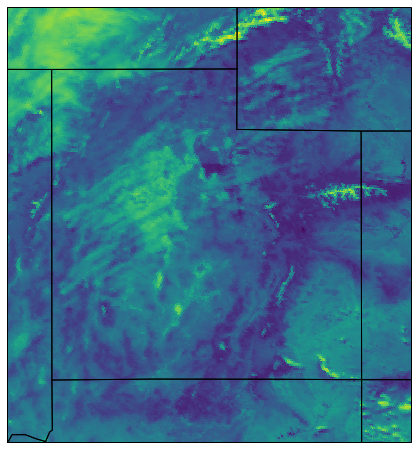

In [11]:
geos16 = dat16.metpy.cartopy_crs

# ax2 = fig.add_subplot(1, 2, 2, projection=pc)

# ax1.set_extent([-114.75, -108.25, 36, 43], crs=pc)
# ax2.set_extent([-114.75, -108.25, 36, 43], crs=pc)
R16 = rgb16[:,:,0]
from pyresample import image, geometry
prj = pyproj.Proj("+proj=eqc +units=m") 
a = prj(-114.75, 36) # lower left coordinates
b = prj(-108.25, 43) # upper right coordinates
extent = a + b
goes16_area = geometry.AreaDefinition('GOES-16', 'CONUS',
                                'GOES-16',
                                {'a': 6378137.0,
                                 'b': 6356752.31414,
                                 'rf': 298.2572221,
                                 'proj': 'geos',
                                 'lon_0': -75.0,
                                 'lat_0': 0.0,
                                'h': 35786023.0,
                                 'x_0': 0,
                                 'y_0': 0,
                                 'units': 'm',
                                 'sweep': 'x'},
                                R16.shape[1], R16.shape[0],
                              [float(x16.min()), float(x16.max()),float(y16.min()), float(y16.max())])
area_pc_def = geometry.AreaDefinition('areaD', 'CONUS-UTAH', 'areaD',
                                  {'ellps': 'WGS84',
                                   'proj': 'eqc', 
                                   'lon_0': 0},
                                    800, 800,
                                   extent)
geos16_con_nn = image.ImageContainerNearest(R16, goes16_area, radius_of_influence=50000)
area_con_nn = geos16_con_nn.resample(area_pc_def)
image_pc = area_con_nn.image_data
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1, projection=pc)
ax1.set_extent([-114.75, -108.25, 36, 43], crs=pc)
ax1.imshow(image_pc,extent = [-114.75, -108.25, 36, 43], origin='upper')
ax1.add_feature(ccrs.cartopy.feature.STATES)

In [12]:
import numpy as np
from datetime import datetime, timedelta
from pyproj import Proj
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import sys
import pyproj
from netCDF4 import Dataset
import metpy

sys.path.append('/pyBKB_v3')

# G16 =xarray.open_dataset('OR_ABI-L2-MCMIPC-M6_G16_s20191771701200_e20191771703573_c20191771704096.nc')
# G17 = xarray.open_dataset('OR_ABI-L2-MCMIPC-M6_G17_s20191771701197_e20191771703570_c20191771704070.nc')

dataset16 = Dataset('OR_ABI-L2-MCMIPC-M6_G16_s20191771701200_e20191771703573_c20191771704096.nc')
dataset17 = Dataset('OR_ABI-L2-MCMIPC-M6_G17_s20191771701197_e20191771703570_c20191771704070.nc')
G16 = xarray.open_dataset('OR_ABI-L2-MCMIPC-M6_G16_s20191771701200_e20191771703573_c20191771704096.nc') #using metpy for reading satellite or weather data
G17 = xarray.open_dataset('OR_ABI-L2-MCMIPC-M6_G17_s20191771701197_e20191771703570_c20191771704070.nc')

pc = ccrs.PlateCarree()
rgb16 = make_RGB(G16)
rgb17 = make_RGB(G17)


dat16 = G16.metpy.parse_cf('CMI_C02')
dat17 = G17.metpy.parse_cf('CMI_C02')

x16 = dat16.x
y16 = dat16.y

x17 = dat17.x
y17 = dat17.y

/opt/home/adomakor412/.conda/envs/GOESCode/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/opt/home/adomakor412/.conda/envs/GOESCode/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


In [13]:
R16.shape

(1500, 2500)

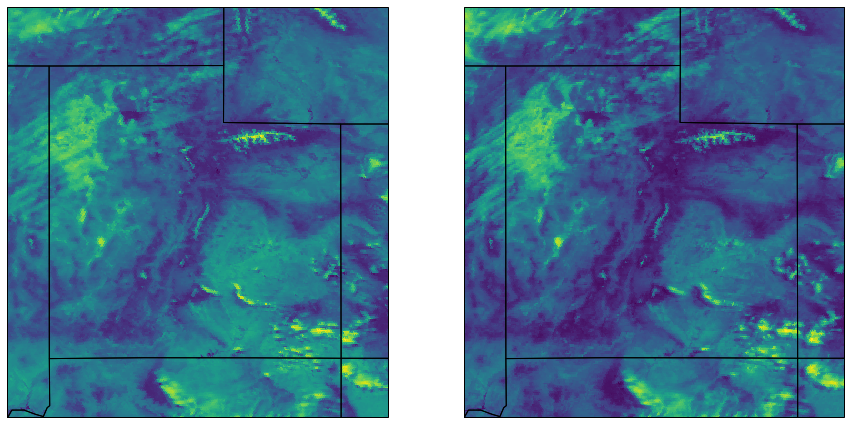

In [14]:

R16 = rgb16[:,:,0]
R17 = rgb17[:,:,0]

from pyresample import image, geometry

goes16_area = geometry.AreaDefinition('GOES-16', 'CONUS',
                                'GOES-16',
                                {'a': 6378137.0,
                                 'b': 6356752.31414,
                                 'rf': 298.2572221,
                                 'proj': 'geos',
                                 'lon_0': -75.0,
                                 'lat_0': 0.0,
                                'h': 35786023.0,
                                 'x_0': 0,
                                 'y_0': 0,
                                 'units': 'm',
                                 'sweep': 'x'},
                                R16.shape[1], R16.shape[0],
                              [float(x16.min()), float(y16.min()),float(x16.max()),  float(y16.max())])
goes17_area = geometry.AreaDefinition('GOES-17', 'CONUS',
                                'GOES-17',
                                {'a': 6378137.0,
                                 'b': 6356752.31414,
                                 'rf': 298.2572221,
                                 'proj': 'geos',
                                 'lon_0': -137.0,
                                 'lat_0': 0.0,
                                 'h': 35786023.0,
                                 'x_0': 0,
                                 'y_0': 0,
                                 'units': 'm',
                                 'sweep': 'x'},
                                R17.shape[1], R17.shape[0],
                              [float(x17.min()), float(y17.min()),float(x17.max()),  float(y17.max())])
area_pc_def = geometry.AreaDefinition('areaD', 'CONUS-UTAH', 'areaD',
                                  {'ellps': 'WGS84',
                                   'proj': 'eqc', 
                                   'lon_0': 0},
                                    800, 800,
                                   extent)
geos16_con_nn = image.ImageContainerNearest(R16, goes16_area, radius_of_influence=50000)
area_con_nn_16 = geos16_con_nn.resample(area_pc_def)
image_pc_16 = area_con_nn_16.image_data

geos17_con_nn = image.ImageContainerNearest(R17, goes17_area, radius_of_influence=50000)
area_con_nn_17 = geos17_con_nn.resample(area_pc_def)
image_pc_17 = area_con_nn_17.image_data

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(1, 2, 1, projection=pc)
ax2 = fig.add_subplot(1, 2, 2, projection=pc)

ax1.set_extent([-114.75, -108.25, 36, 43], crs=pc)
ax1.imshow(image_pc_16, extent=[-114.75, -108.25, 36, 43], origin='upper')
ax1.add_feature(ccrs.cartopy.feature.STATES)
ax2.set_extent([-114.75, -108.25, 36, 43], crs=pc)
ax2.imshow(image_pc_17, extent=[-114.75, -108.25, 36, 43], origin='upper')
ax2.add_feature(ccrs.cartopy.feature.STATES)

In [15]:
def make_RGB(C, night_IR=True):
    """
    C        - GOES file opened with xarray
    night_IR - Set nighttime pixels as clean IR channel (channel 13, 10.3 um).
    """
    
    # Load the three channels into appropriate R, G, and B variables
    R = C['CMI_C02'].data
    G = C['CMI_C03'].data
    B = C['CMI_C01'].data

    ######################################################################
    #

    # Apply range limits for each channel. RGB values must be between 0 and 1
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    ######################################################################
    #

    # Apply a gamma correction to the image
    gamma = 2.2
    R = np.power(R, 1/gamma)
    G = np.power(G, 1/gamma)
    B = np.power(B, 1/gamma)

    ######################################################################
    #

    # Calculate the "True" Green
    G_true = 0.45 * R + 0.1 * G + 0.45 * B
    G_true = np.maximum(G_true, 0)
    G_true = np.minimum(G_true, 1)
    
    # The RGB array with the raw veggie band
    RGB_veggie = np.dstack([R, G, B])

    # The RGB array for the true color image
    RGB = np.dstack([R, G_true, B])
    
    if night_IR:
        cleanIR = C['CMI_C13'].data
        # Normalize the channel between a range. e.g. cleanIR =
        # (cleanIR-minimum)/(maximum-minimum)
        cleanIR = (cleanIR-90)/(313-90)

        # Apply range limits for each channel. RGB values must be between 0 and 1
        cleanIR = np.clip(cleanIR, 0, 1)

        # Invert colors so that cold clouds are white
        cleanIR = 1 - cleanIR

        # Lessen the brightness of the coldest clouds so they don't appear so bright
        # when we overlay it on the true color image
        cleanIR = cleanIR/1.4
    
        # Fill RGB where true color is black with IR values.
        RGB = np.dstack([np.maximum(R, cleanIR),
                         np.maximum(G_true, cleanIR),
                         np.maximum(B, cleanIR)])
        
    return RGB